In [ ]:
# Check GPU setup in Colab
%tensorflow_version 1.x
import tensorflow as tf

# Silence the tensorflow warning message
tf.get_logger().setLevel('ERROR')

# Check GPU coinfiguration in Colab (T4 GPU)
print("Tensorflow version: ", tf.__version__)
print(tf.test.gpu_device_name())
# Your expected output will be '/device:GPU:0'

TensorFlow 1.x selected.
Tensorflow version:  1.15.2
/device:GPU:0


In [ ]:
from skimage import data
from skimage.color import rgb2hed
from skimage.color import hed2rgb
from skimage.exposure import rescale_intensity
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import random
import cv2
import tensorflow as tf


np.random.seed(42)

In [ ]:
# Then you’ll see a link, click on that link, allow access
# Copy the code that pops up, paste it in the box, hit enter

from google.colab import drive
drive.mount('/content/gdrive')

# Change working directory to be current folder, please keep ''/content/gdrive/My Drive/XXX' in the path and change XXX to be your own folder.
# The path is case sensitive.
import os
os.chdir('/content/gdrive/My Drive/iss/capstone')
!ls

Mounted at /content/gdrive
colab  data


In [ ]:
# rotation
def tf_rotate(input_image, min_angle = -np.pi/2, max_angle = np.pi/2):
  '''
  Tensorflow rotates the image randomly
  : param input_image: image input
  : param min_angle: minimum rotation angle
  : param max? Angle: maximum rotation angle
  : Return: rotated image
  '''
  distorted_image = tf.expand_dims(input_image, 0)
  random_angles = tf.random.uniform(shape=(tf.shape(distorted_image)[0],), minval = min_angle , maxval = max_angle)
  distorted_image = tf.contrib.image.transform(
    distorted_image,
    tf.contrib.image.angles_to_projective_transforms(
      random_angles, tf.cast(tf.shape(distorted_image)[1], tf.float32), tf.cast(tf.shape(distorted_image)[2], tf.float32)
    ))
  rotate_image = tf.squeeze(distorted_image, [0])
  rotate_image=rotate_image.eval(session=tf.compat.v1.Session())
  return rotate_image


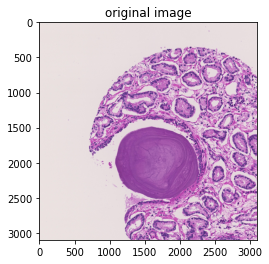

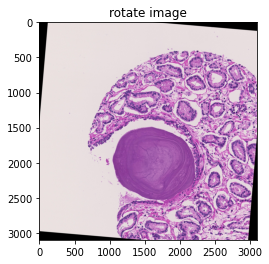

In [ ]:
img = cv2.imread("./data/images/ZT111_4_A_1_2.jpg",cv2.IMREAD_COLOR)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title('original image')
plt.show()

img = cv2.imread("./data/images/ZT111_4_A_1_2.jpg",cv2.IMREAD_COLOR)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
rotate_image = tf_rotate(img, -np.pi/2, np.pi/2)
# print('output:',output)
plt.imshow(rotate_image)
plt.title('rotate image')
plt.show()
